In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# Dependencies
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

### Loading the dataset

In [4]:
# Importing csv file
os.chdir('/Users/ruddysimonpour/Desktop/Diabetes/source/')
diabetes_file = pd.read_csv("pima-data.csv", low_memory = False)

In [5]:
diabetes_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
num_preg        768 non-null int64
glucose_conc    768 non-null int64
diastolic_bp    768 non-null int64
thickness       768 non-null int64
insulin         768 non-null int64
bmi             768 non-null float64
diab_pred       768 non-null float64
age             768 non-null int64
skin            768 non-null float64
diabetes        768 non-null bool
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [6]:
diabetes_file.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.0000
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.0000
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.0000
thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.0000
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.0000
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.1000
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.4200
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.0000
skin,768.0,0.809136,0.628517,0.000,0.00000,0.9062,1.26080,3.9006


In [7]:
diabetes_file

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [8]:
# Check the Null values 
diabetes_file.isnull()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False,False


We checked the null values and it shows that we don't have missing values in the dataset, however regarding to this article: 
- https://www.sciencedirect.com/science/article/pii/S2352914816300016
"In 2001, 376 of 786 observations in the PID dataset were shownto lack experimental validity[65]because for some attributes, thevalue ofzerowas recorded in place of missing experimentalobservations[66]. It was also shown that if the instances withzerovalues were removed, performance could be dramaticallyimproved[65]."

We considering the zero values as missing values. 
Now we can replace zeros with median.

In [9]:
# Replacing zero to NaN values
data = diabetes_file[[
                      "glucose_conc",
                      "diastolic_bp",
                      "thickness",
                      "insulin",
                      "bmi",
                      "skin"]]= diabetes_file\
[["glucose_conc","diastolic_bp","thickness","insulin","bmi","skin"]].replace(0,np.nan)
data

,glucose_conc,diastolic_bp,thickness,insulin,bmi,skin
0,148.0,72.0,35.0,NaN,33.6,1.3790
1,85.0,66.0,29.0,NaN,26.6,1.1426
2,183.0,64.0,NaN,NaN,23.3,NaN
3,89.0,66.0,23.0,94.0,28.1,0.9062
4,137.0,40.0,35.0,168.0,43.1,1.3790
...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,1.8912
764,122.0,70.0,27.0,NaN,36.8,1.0638
765,121.0,72.0,23.0,112.0,26.2,0.9062
766,126.0,60.0,NaN,NaN,30.1,NaN


In [10]:
# replacing NaN values with median
diabetes_file['glucose_conc'] = diabetes_file['glucose_conc'].fillna((diabetes_file['glucose_conc'].mean()))
diabetes_file['diastolic_bp'] = diabetes_file['diastolic_bp'].fillna((diabetes_file['diastolic_bp'].mean()))
diabetes_file['thickness'] = diabetes_file['thickness'].fillna((diabetes_file['thickness'].mean()))
diabetes_file['insulin'] = diabetes_file['insulin'].fillna((diabetes_file['insulin'].mean()))
diabetes_file['bmi'] = diabetes_file['bmi'].fillna((diabetes_file['bmi'].mean()))
diabetes_file['skin'] = diabetes_file['bmi'].fillna((diabetes_file['skin'].mean()))

In [11]:
diabetes_file

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,33.6,True
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,26.6,False
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,23.3,True
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,28.1,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,43.1,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,32.9,False
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,36.8,False
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,26.2,False
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,30.1,True


### Matrix of correlation between attributes

In [12]:
# Finding correlation between different trends
corr = diabetes_file.corr()
corr.style.background_gradient(cmap='coolwarm')

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1,0.127911,0.208522,0.0829891,0.056027,0.0215651,-0.0335227,0.544341,0.0215651,0.221898
glucose_conc,0.127911,1,0.218367,0.192991,0.420157,0.230941,0.13706,0.266534,0.230941,0.492928
diastolic_bp,0.208522,0.218367,1,0.192816,0.0725169,0.281268,-0.00276336,0.324595,0.281268,0.166074
thickness,0.0829891,0.192991,0.192816,1,0.158139,0.542398,0.100966,0.127872,0.542398,0.215299
insulin,0.056027,0.420157,0.0725169,0.158139,1,0.166586,0.0986339,0.136734,0.166586,0.214411
bmi,0.0215651,0.230941,0.281268,0.542398,0.166586,1,0.1534,0.0255192,1,0.311924
diab_pred,-0.0335227,0.13706,-0.00276336,0.100966,0.0986339,0.1534,1,0.0335613,0.1534,0.173844
age,0.544341,0.266534,0.324595,0.127872,0.136734,0.0255192,0.0335613,1,0.0255192,0.238356
skin,0.0215651,0.230941,0.281268,0.542398,0.166586,1,0.1534,0.0255192,1,0.311924
diabetes,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,0.311924,1


In this dataset we found out that skin and bmi have correlation to each other. So we need to remove one of them.


In [13]:
# removing correlated columns
del diabetes_file['skin']

In [14]:
diabetes_file

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,True
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,False
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,True
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,False
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,False
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,False
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,False
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,True


### Changing diabetes values to 0 and 1

In [15]:
mapping = {True:1,
           False:0}
diabetes_file['diabetes'] = diabetes_file['diabetes'].map(mapping)
diabetes_file

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


Now, we need to consider the class distribution, to see if our data distributed properly or not.

In [16]:
dist = diabetes_file['diabetes'].value_counts()
dist

0    500
1    268
Name: diabetes, dtype: int64

In [17]:
total_numbers = len(diabetes_file)
diabetes_true = len(diabetes_file.loc[diabetes_file['diabetes']==1])
diabetes_false = len(diabetes_file.loc[diabetes_file['diabetes']==0])
print('Number of diabates people: {0} ({1:2.2f}%)'.format(diabetes_true, (diabetes_true)/(total_numbers) * 100))
print('Number of non-diabetes people: {0} ({1:2.2f}%)'.format(diabetes_false, (diabetes_false)/(total_numbers) * 100))

Number of diabates people: 268 (34.90%)
Number of non-diabetes people: 500 (65.10%)


We notice that roughly 30 percent of the dataset are diabetes people. We can conclude that our data is biased to people who they don't have diabetes.

## Visualize the distribution using Box plot

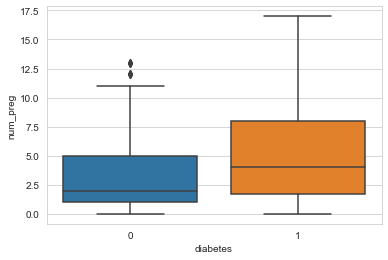

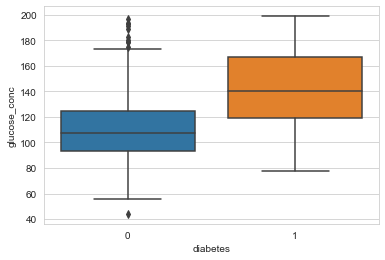

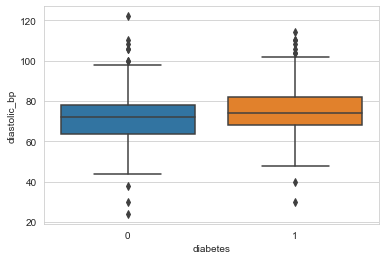

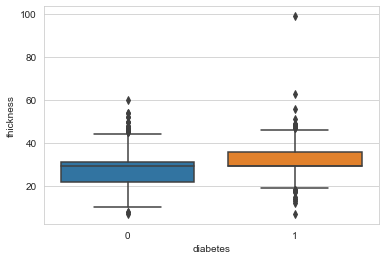

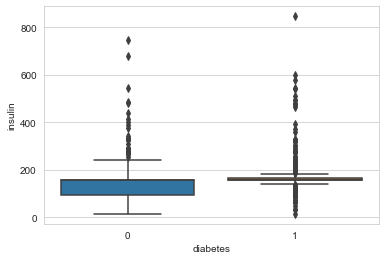

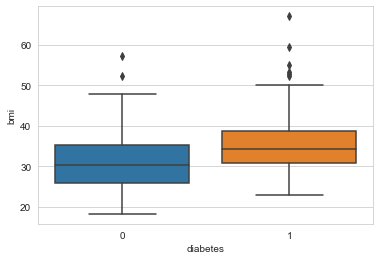

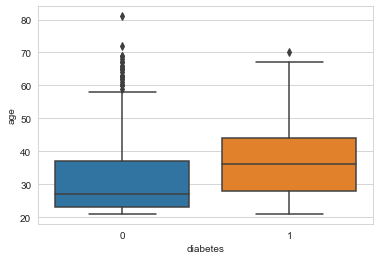

In [18]:
def plot_box(diabetes_file, cols, col_x = 'diabetes'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=diabetes_file)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()
        
columns_name = ["num_preg","glucose_conc","diastolic_bp","thickness","insulin","bmi","age"]        
plot_box(diabetes_file, columns_name)

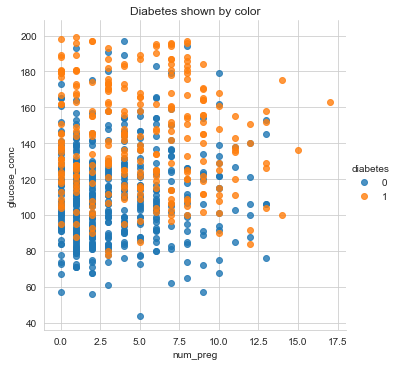

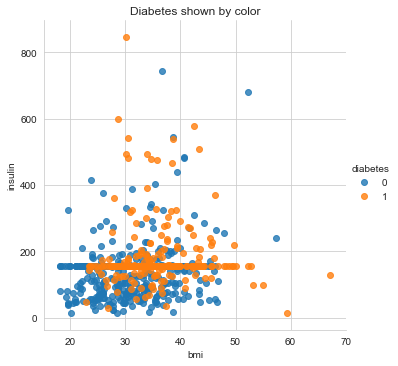

In [19]:
%matplotlib inline
def plot_diabetes(diabetes_file, col1, col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.lmplot(x = col1, y = col2, 
               data = diabetes_file, 
               hue = "diabetes", 
               fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Diabetes shown by color')
    plt.show()
plot_diabetes(diabetes_file, 'num_preg', 'glucose_conc')
plot_diabetes(diabetes_file, 'bmi', 'insulin')

### Splitting data sets for machine learning using scikit-learn

In [20]:
y = diabetes_file["diabetes"]
target_names = ['positive', 'negative']
y.shape

(768,)

In [21]:
X = diabetes_file.drop("diabetes", axis=1)
X.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


## Train and evaluate the KNN mode

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.656
k: 3, Train/Test Score: 0.842/0.661
k: 5, Train/Test Score: 0.818/0.646
k: 7, Train/Test Score: 0.797/0.656
k: 9, Train/Test Score: 0.806/0.688
k: 11, Train/Test Score: 0.786/0.682
k: 13, Train/Test Score: 0.786/0.688
k: 15, Train/Test Score: 0.781/0.698
k: 17, Train/Test Score: 0.780/0.708
k: 19, Train/Test Score: 0.783/0.724


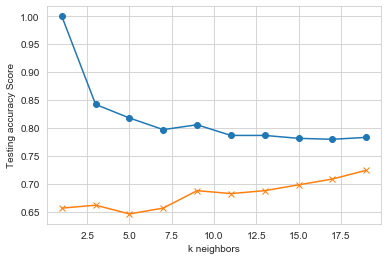

In [23]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.688
